In [1]:
# Load the modules we're going to need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import glob
import librosa
import pandas as pd# Added
from IPython.display import Audio
from sklearn.externals import joblib

In [2]:
# We've previously preprocessed our data and coverted all files to a sample rate of 44100
samplerate = 44100

In [3]:
# Specify where the audio files for training and testing reside
train_folder = './mir_class_train'
test_folder = './mir_class_test'

# Get a list of all the training audio files (must be .WAV files)
train_files = glob.glob(os.path.join(train_folder, '*.wav'))

# Get a list of all the test audio files (must be .WAV files)
test_files = glob.glob(os.path.join(test_folder, '*.wav'))

# Specify the labels (classes) we're going to classify the data into
label0 = 'abscent'
label1 = 'present'
labels = [label0, label1]

In [4]:
window_size = 2048
hop_size = 256
n_bands = 40
n_mfcc = 13

## Comparing dataset labels with grouped labels

In [5]:
# Make 1 second summarization as features with half second of hop length
# 172 frames == 1 second (using 44100 samples per second)
feature_length = 166
half_sec = 83

In [6]:
def print_labels(vec_orig, vec_calc):
    """ Receive two vocal/unvocal arrays with different size and plot them normalized"""
    orig = vec_orig.copy()
    orig[vec_orig>0] = 1
    orig[vec_orig<=0] = None

    calc = vec_calc.copy()
    calc[vec_calc>0] = 1
    calc[vec_calc<=0] = None

    x1 = np.linspace(0, 1, len(orig))
    x2 = np.linspace(0, 1, len(calc))
    
    plt.figure(figsize=(12,4))
    plt.plot(x1, orig, linewidth=6, label='Original')
    plt.plot(x2, calc, linewidth=3, label='Calculated')
    plt.legend()
    plt.show()

### For MFCC segments on train set

filename: LizNelson_Coldwar_MIX.wav
mfcc shape:  (13, 29284)
number of chunks 352
file label size: 352
Original proportion of vocals:  0.5371875426854255
Resumed proportion of vocals:  0.6505681818181818
 


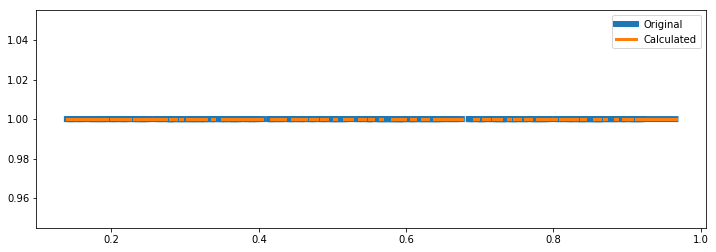

filename: StrandOfOaks_Spacestation_MIX.wav
mfcc shape:  (13, 42010)
number of chunks 506
file label size: 506
Original proportion of vocals:  0.219000690328263
Resumed proportion of vocals:  0.2509881422924901
 


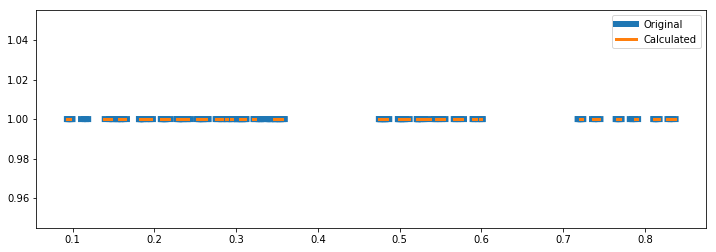

filename: AvaLuna_Waterduct_MIX.wav
mfcc shape:  (13, 44670)
number of chunks 538
file label size: 538
Original proportion of vocals:  0.30378329975374974
Resumed proportion of vocals:  0.3048327137546468
 


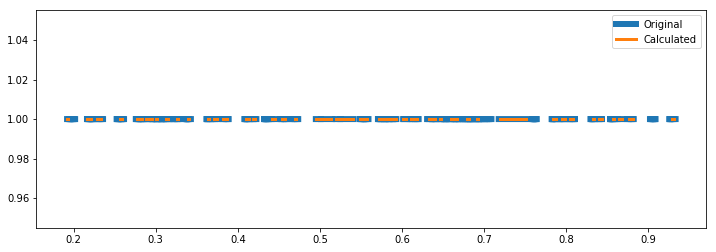

filename: HezekiahJones_BorrowedHeart_MIX.wav
mfcc shape:  (13, 41616)
number of chunks 501
file label size: 501
Original proportion of vocals:  0.3314350249903883
Resumed proportion of vocals:  0.3852295409181637
 


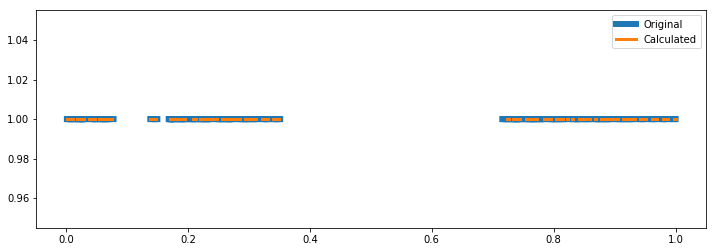

filename: PurlingHiss_Lolita_MIX.wav
mfcc shape:  (13, 44139)
number of chunks 531
file label size: 531
Original proportion of vocals:  0.2121706427422461
Resumed proportion of vocals:  0.23163841807909605
 


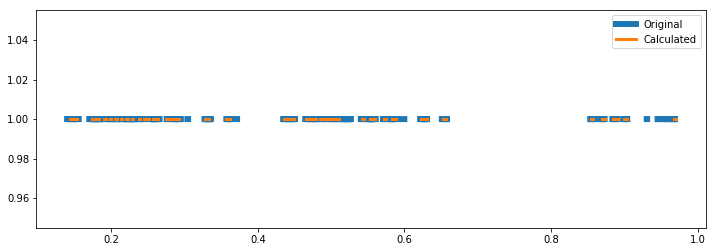

filename: LizNelson_ImComingHome_MIX.wav
mfcc shape:  (13, 30957)
number of chunks 372
file label size: 372
Original proportion of vocals:  0.7668626437524227
Resumed proportion of vocals:  0.8279569892473119
 


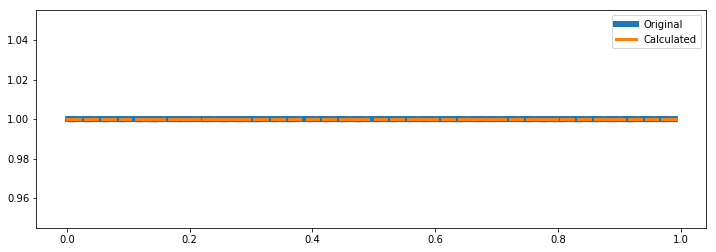

filename: TheSoSoGlos_Emergency_MIX.wav
mfcc shape:  (13, 28769)
number of chunks 346
file label size: 346
Original proportion of vocals:  0.3816608154610866
Resumed proportion of vocals:  0.4421965317919075
 


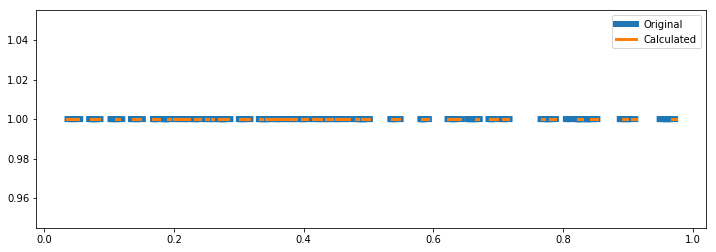

filename: TheScarletBrand_LesFleursDuMal_MIX.wav
mfcc shape:  (13, 52307)
number of chunks 630
file label size: 630
Original proportion of vocals:  0.3393809623950905
Resumed proportion of vocals:  0.4
 


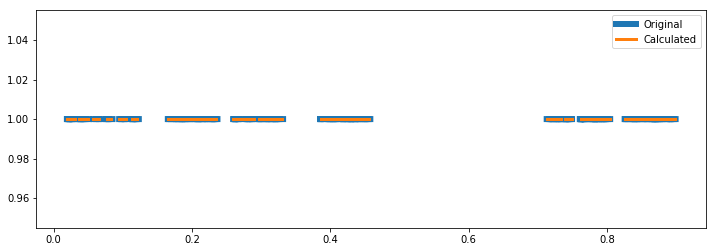

filename: PortStWillow_StayEven_MIX.wav
mfcc shape:  (13, 54611)
number of chunks 657
file label size: 657
Original proportion of vocals:  0.2708611818131878
Resumed proportion of vocals:  0.3013698630136986
 


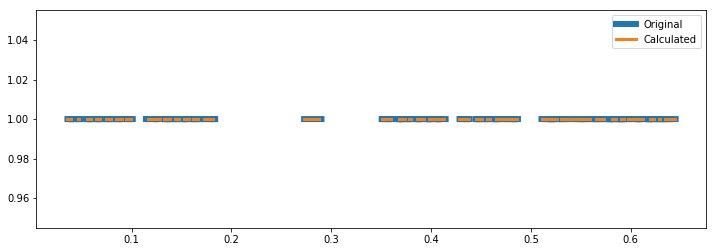

filename: MusicDelta_Rock_MIX.wav
mfcc shape:  (13, 2256)
number of chunks 27
file label size: 27
Original proportion of vocals:  0.786790780141844
Resumed proportion of vocals:  0.9629629629629629
 


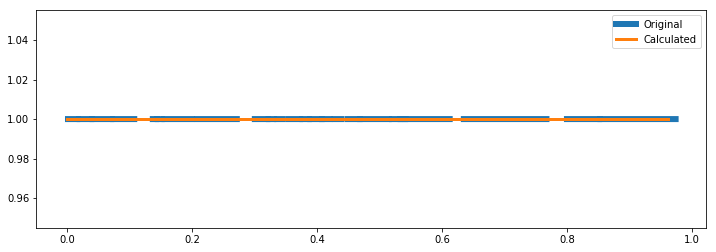

filename: Snowmine_Curfews_MIX.wav
mfcc shape:  (13, 47407)
number of chunks 571
file label size: 571
Original proportion of vocals:  0.3451599974687283
Resumed proportion of vocals:  0.38879159369527144
 


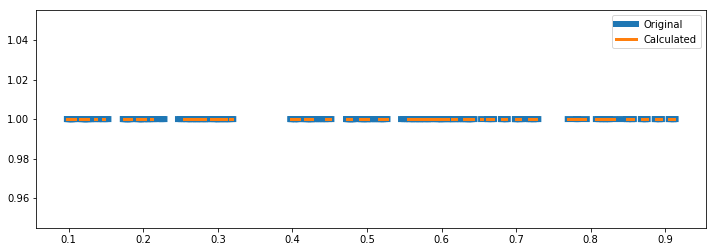

filename: StevenClark_Bounty_MIX.wav
mfcc shape:  (13, 49865)
number of chunks 600
file label size: 600
Original proportion of vocals:  0.4732377419031385
Resumed proportion of vocals:  0.57
 


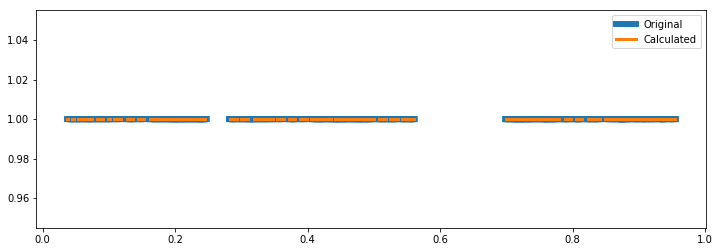

filename: LizNelson_Rainfall_MIX.wav
mfcc shape:  (13, 49081)
number of chunks 591
file label size: 591
Original proportion of vocals:  0.5635289323553382
Resumed proportion of vocals:  0.6294416243654822
 


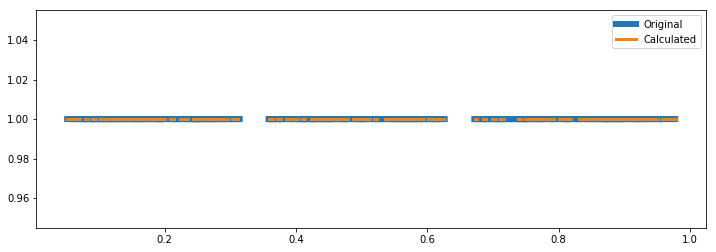

filename: FacesOnFilm_WaitingForGa_MIX.wav
mfcc shape:  (13, 44382)
number of chunks 534
file label size: 534
Original proportion of vocals:  0.24701455545040782
Resumed proportion of vocals:  0.2752808988764045
 


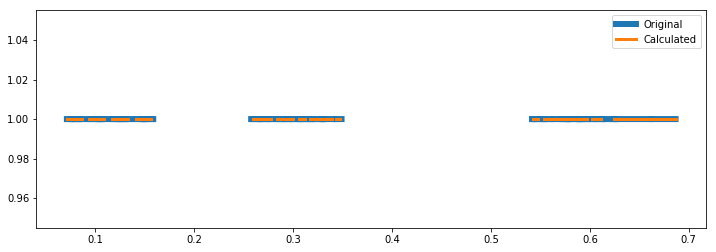

filename: Wolf_DieBekherte_MIX.wav
mfcc shape:  (13, 32531)
number of chunks 391
file label size: 391
Original proportion of vocals:  0.6344604980018445
Resumed proportion of vocals:  0.6854219948849105
 


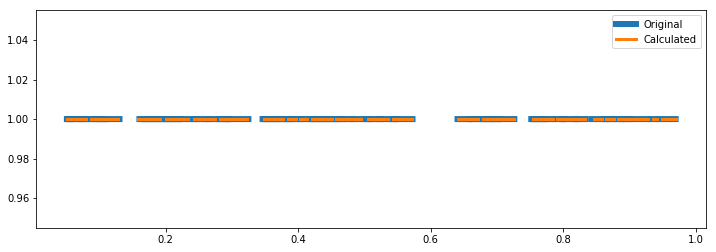

filename: SecretMountains_HighHorse_MIX.wav
mfcc shape:  (13, 61241)
number of chunks 737
file label size: 737
Original proportion of vocals:  0.34850835224767723
Resumed proportion of vocals:  0.3677069199457259
 


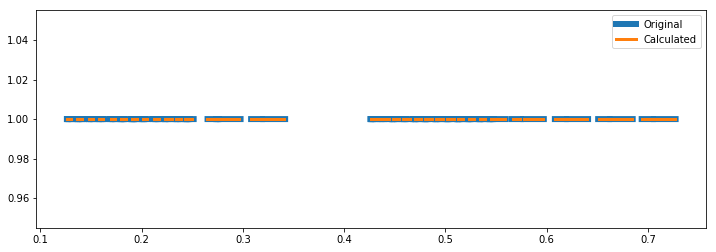

filename: MusicDelta_Reggae_MIX.wav
mfcc shape:  (13, 3009)
number of chunks 36
file label size: 36
Original proportion of vocals:  0.3835161183117315
Resumed proportion of vocals:  0.5
 


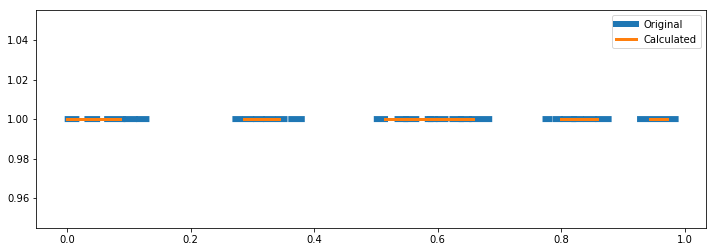

filename: NightPanther_Fire_MIX.wav
mfcc shape:  (13, 36692)
number of chunks 442
file label size: 442
Original proportion of vocals:  0.4977651804208002
Resumed proportion of vocals:  0.581447963800905
 


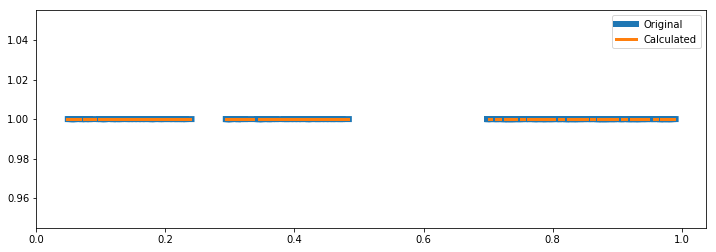

filename: Schumann_Mignon_MIX.wav
mfcc shape:  (13, 45279)
number of chunks 545
file label size: 545
Original proportion of vocals:  0.5825566500287115
Resumed proportion of vocals:  0.6770642201834862
 


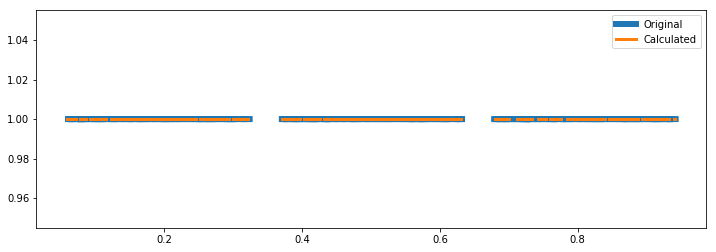

vocal  4039
unvocal  4868


In [8]:
# Define lists to store the training features and corresponding training labels
train_features = []
train_labels = []

vocal_chuncks = 0
unvocal_chuncks = 0
# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in train_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load audio
    audio, sr = librosa.load(tf, sr=samplerate, mono=True)

    # Extract mfcc coefficients (remember we will discard the first one)
    # To see all the relevant kwarg arugments consult the documentation for
    # librosa.feature.mfcc, librosa.feature.melspectrogram and librosa.filters.mel
    mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=window_size, hop_length=hop_size,
                                fmax=samplerate/2, n_mels=n_bands, n_mfcc=(n_mfcc + 1))
          
    # Discard the first coefficient
    mfcc = mfcc[1:,:]
    
    # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"MELODY1.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)[:,1]
    
    
    print ("mfcc shape: ", mfcc.shape)
    print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
    for chunk in range(int(mfcc.shape[1]/half_sec)):
        start = chunk*half_sec
        mfcc_means = np.mean(mfcc[:,start:start+feature_length], 1)
        mfcc_stddevs = np.std(mfcc[:,start:start+feature_length], 1)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((mfcc_means, mfcc_stddevs), axis=0))
   
        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) > half_sec:
            tf_label.append('present')
        else:
            tf_label.append('abscent')
            

    # Get labels index
    tf_label_ind = [labels.index(lbl) for lbl in tf_label]
    print("file label size: {:d}".format(len(tf_label_ind)))
    
    vocal = sum([1 for x in f0line if x > 1])
    print("Original proportion of vocals: ", vocal/len(f0line))
    
    vocal = sum([x for x in tf_label_ind if x == 1])
    vocal_chuncks += vocal
    unvocal_chuncks += len(tf_label_ind) - vocal
    print("Resumed proportion of vocals: ", vocal/len(tf_label_ind))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        train_features.append(feature_vector[idx])
        train_labels.append(tf_label_ind[idx])
    print(" ")
   
    print_labels(np.array(f0line), np.array(tf_label_ind).astype('float'))

    
print ("vocal ", vocal_chuncks)
print ("unvocal ", unvocal_chuncks)

In [9]:
print ("Rate train vocal", vocal_chuncks/(vocal_chuncks+unvocal_chuncks))
print ("Rate train unvocal", unvocal_chuncks/(vocal_chuncks+unvocal_chuncks))

Rate train vocal 0.45346356798024023
Rate train unvocal 0.5465364320197598


### For MFCC segments on test set

filename: HeladoNegro_MitadDelMundo_MIX.wav
mfcc matrix shape: (13, 31327)
number of chunks 377
file label size: (377,)
Original proportion of vocals:  0.406199125355125
Resumed proportion of vocals:  0.41379310344827586
 


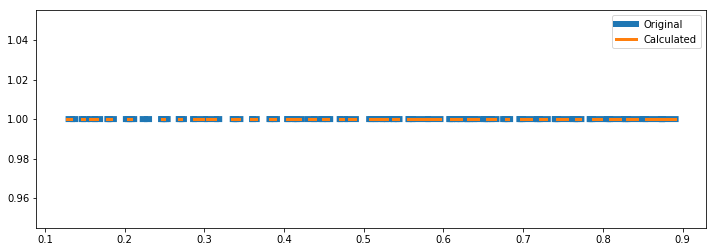

filename: SweetLights_YouLetMeDown_MIX.wav
mfcc matrix shape: (13, 67526)
number of chunks 813
file label size: (813,)
Original proportion of vocals:  0.4621843761569789
Resumed proportion of vocals:  0.5252152521525215
 


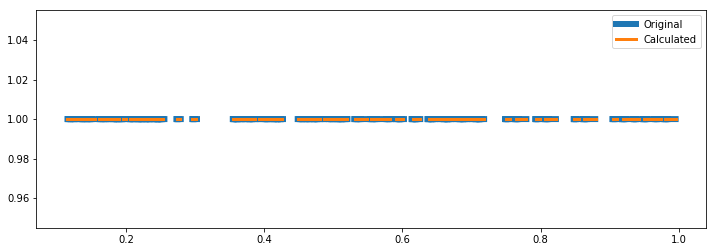

filename: TheDistricts_Vermont_MIX.wav
mfcc matrix shape: (13, 39303)
number of chunks 473
file label size: (473,)
Original proportion of vocals:  0.17700938859629037
Resumed proportion of vocals:  0.19027484143763213
 


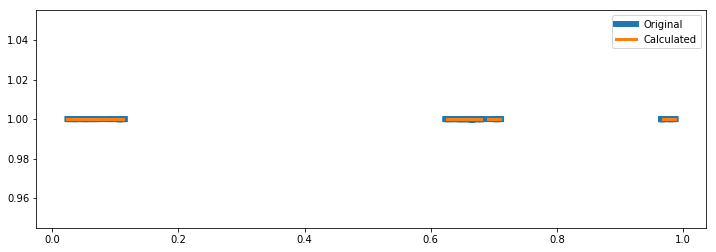

filename: MusicDelta_Rockabilly_MIX.wav
mfcc matrix shape: (13, 4471)
number of chunks 53
file label size: (53,)
Original proportion of vocals:  0.7137105792887497
Resumed proportion of vocals:  0.8113207547169812
 


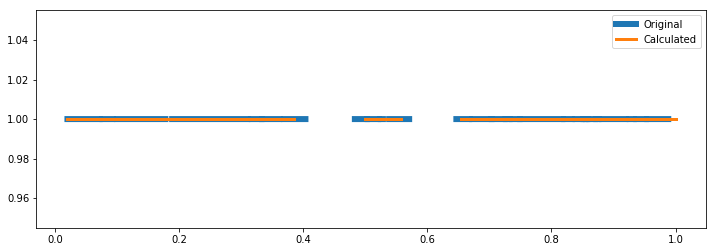

filename: Schubert_Erstarrung_MIX.wav
mfcc matrix shape: (13, 29957)
number of chunks 360
file label size: (360,)
Original proportion of vocals:  0.5102149819735612
Resumed proportion of vocals:  0.5916666666666667
 


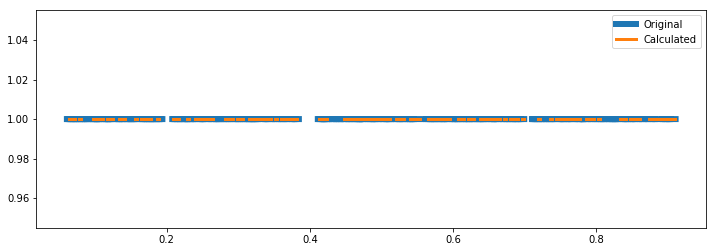

vocal  929
unvocal  1147


In [10]:
# Define lists to store the test features and corresponding test labels
test_features = []
test_labels = []

vocal_chuncks = 0
unvocal_chuncks = 0
# For every audio file in the training set, load the file, compute MFCCs, summarize them over time
# using the mean and standard deviation (for each MFCC coefficient), and then save the features
# and corresponding label in the designated lists
for tf in test_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load audio
    audio, sr = librosa.load(tf, sr=samplerate, mono=True)

    # Extract mfcc coefficients (remember we will discard the first one)
    # To see all the relevant kwarg arugments consult the documentation for
    # librosa.feature.mfcc, librosa.feature.melspectrogram and librosa.filters.mel
    mfcc = librosa.feature.mfcc(audio, sr=sr, n_fft=window_size, hop_length=hop_size,
                                fmax=samplerate/2, n_mels=n_bands, n_mfcc=(n_mfcc + 1))
          
    # Discard the first coefficient
    mfcc = mfcc[1:,:]
    print("mfcc matrix shape: {}".format(mfcc.shape))
    
     # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"MELODY1.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)[:,1]
    
    #print (mfcc.shape)
    print("number of chunks", int(mfcc.shape[1]/half_sec))
    
    feature_vector = []
    tf_label = []
    
    for chunk in range(int(mfcc.shape[1]/half_sec)):
        start = chunk*half_sec
        mfcc_means = np.mean(mfcc[:,start:start+feature_length], 1)
        mfcc_stddevs = np.std(mfcc[:,start:start+feature_length], 1)
    
        # Concatenate means and std. dev's into a single feature vector
        feature_vector.append(np.concatenate((mfcc_means, mfcc_stddevs), axis=0))
   
        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) > half_sec:
            tf_label.append('present')
        else:
            tf_label.append('abscent')
    
    #Get labels index
    tf_label_ind = np.array([labels.index(lbl) for lbl in tf_label])
    print("file label size: {}".format(tf_label_ind.shape))
    
    vocal = sum([1 for x in f0line if x > 1])
    print("Original proportion of vocals: ", vocal/len(f0line))
    
    vocal = sum([x for x in tf_label_ind if x == 1])
    vocal_chuncks += vocal
    unvocal_chuncks += len(tf_label_ind) - vocal
    print("Resumed proportion of vocals: ", vocal/len(tf_label_ind))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        test_features.append(feature_vector[idx])
        test_labels.append(tf_label_ind[idx])
    print(" ")
    print_labels(np.array(f0line), np.array(tf_label_ind).astype('float'))
    
print ("vocal ", vocal_chuncks)
print ("unvocal ", unvocal_chuncks)

In [11]:
print ("Rate test vocal", vocal_chuncks/(vocal_chuncks+unvocal_chuncks))
print ("Rate test unvocal", unvocal_chuncks/(vocal_chuncks+unvocal_chuncks))

Rate test vocal 0.447495183044316
Rate test unvocal 0.552504816955684


### For results on classification using SVM with all files on test set

In [12]:
# Load trained model (SVM)
filename = 'finalized_model.sav' 
# load the model from disk
clf = joblib.load(filename)

filename = 'scaler.sav' 
# load the model from disk
scaler = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [13]:
feat_scaled = scaler.transform(test_features)
output = clf.predict(feat_scaled)
origin = test_labels

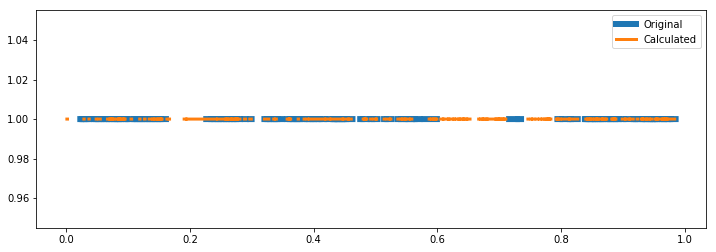

In [14]:
print_labels(np.array(origin).astype('float'), np.array(output).astype('float'))

## Evaluate using VGGish features

In [15]:
# Make 1 second summarization as features with half second of hop length
# 172 frames == 1 second (using 44100 samples per second)
# 166 frames ~ 0.96 second
feature_length = 166
half_sec = 83

filename: LizNelson_Coldwar_MIX.wav
file label size: 353
Original proportion of vocals:  0.5371875426854255
Resumed proportion of vocals:  0.6487252124645893
 


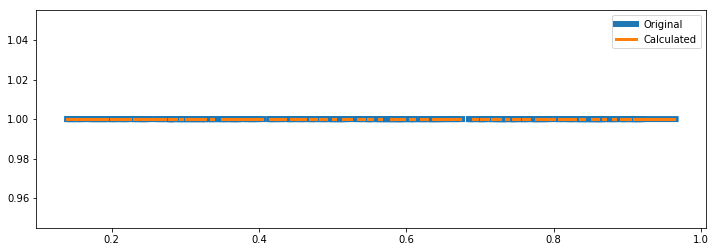

filename: StrandOfOaks_Spacestation_MIX.wav
file label size: 507
Original proportion of vocals:  0.219000690328263
Resumed proportion of vocals:  0.2504930966469428
 


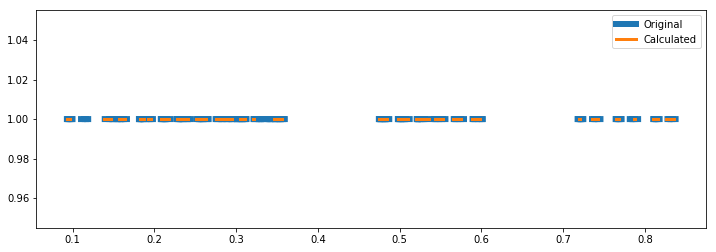

filename: AvaLuna_Waterduct_MIX.wav
file label size: 539
Original proportion of vocals:  0.30378329975374974
Resumed proportion of vocals:  0.3042671614100185
 


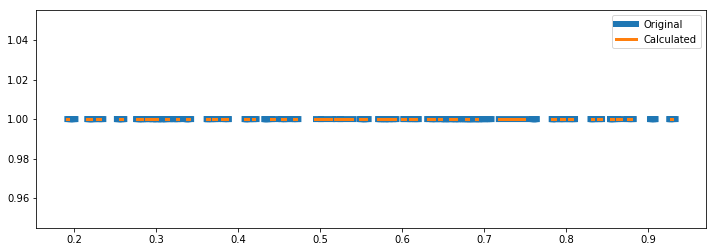

filename: HezekiahJones_BorrowedHeart_MIX.wav
file label size: 502
Original proportion of vocals:  0.3314350249903883
Resumed proportion of vocals:  0.3844621513944223
 


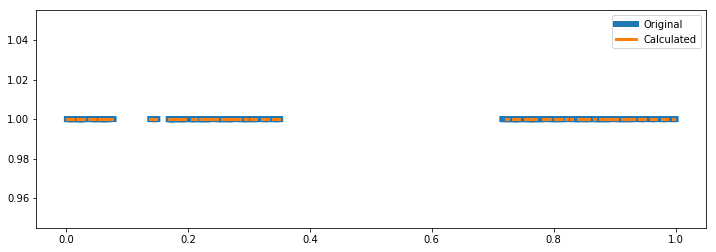

filename: PurlingHiss_Lolita_MIX.wav
file label size: 532
Original proportion of vocals:  0.2121706427422461
Resumed proportion of vocals:  0.231203007518797
 


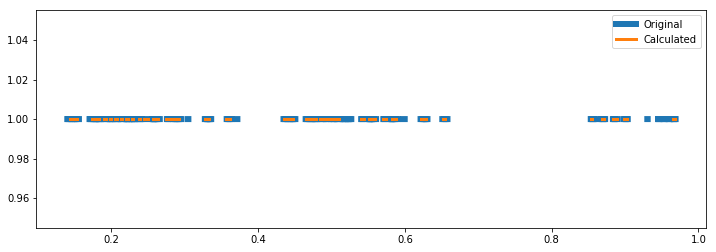

filename: LizNelson_ImComingHome_MIX.wav
file label size: 373
Original proportion of vocals:  0.7668626437524227
Resumed proportion of vocals:  0.8257372654155496
 


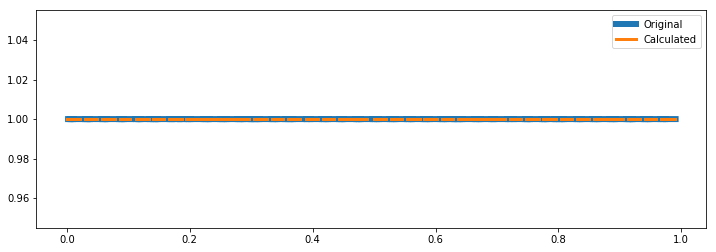

filename: TheSoSoGlos_Emergency_MIX.wav
file label size: 346
Original proportion of vocals:  0.3816608154610866
Resumed proportion of vocals:  0.4421965317919075
 


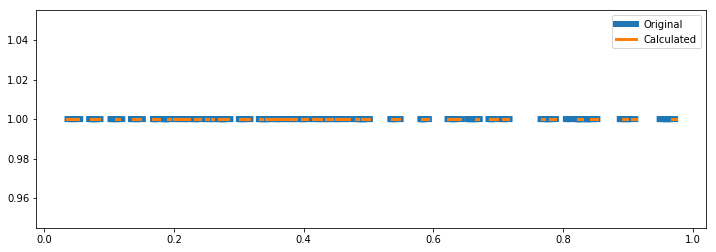

filename: TheScarletBrand_LesFleursDuMal_MIX.wav
file label size: 631
Original proportion of vocals:  0.3393809623950905
Resumed proportion of vocals:  0.3993660855784469
 


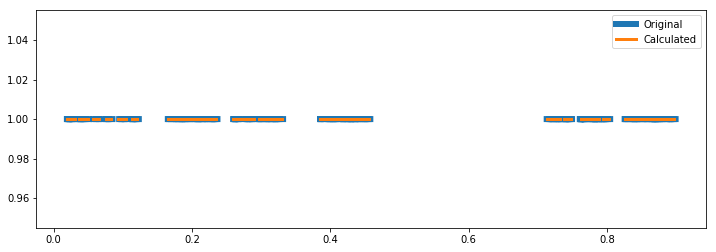

filename: PortStWillow_StayEven_MIX.wav
file label size: 659
Original proportion of vocals:  0.2708611818131878
Resumed proportion of vocals:  0.30045523520485584
 


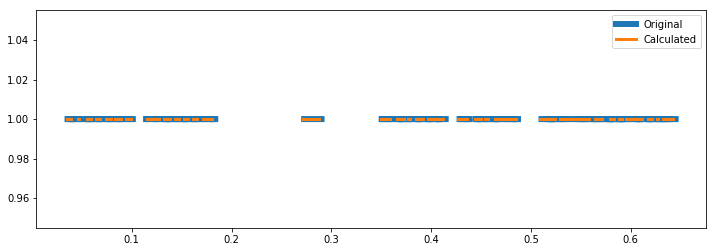

filename: MusicDelta_Rock_MIX.wav
file label size: 26
Original proportion of vocals:  0.786790780141844
Resumed proportion of vocals:  1.0
 


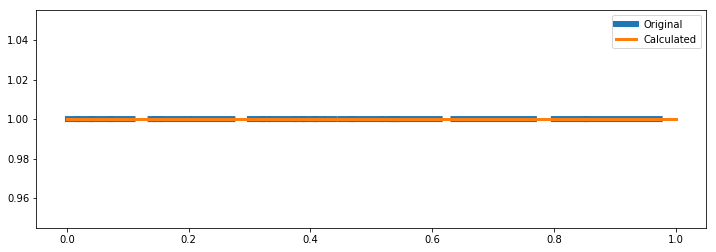

filename: Snowmine_Curfews_MIX.wav
file label size: 572
Original proportion of vocals:  0.3451599974687283
Resumed proportion of vocals:  0.3881118881118881
 


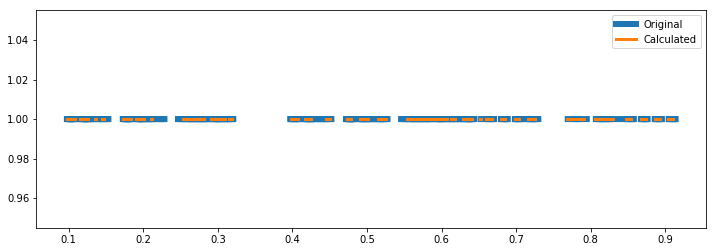

filename: StevenClark_Bounty_MIX.wav
file label size: 602
Original proportion of vocals:  0.4732377419031385
Resumed proportion of vocals:  0.5681063122923588
 


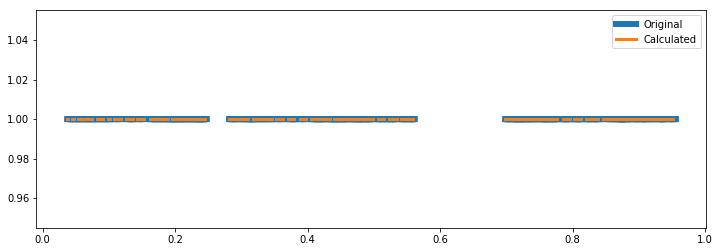

filename: LizNelson_Rainfall_MIX.wav
file label size: 592
Original proportion of vocals:  0.5635289323553382
Resumed proportion of vocals:  0.6283783783783784
 


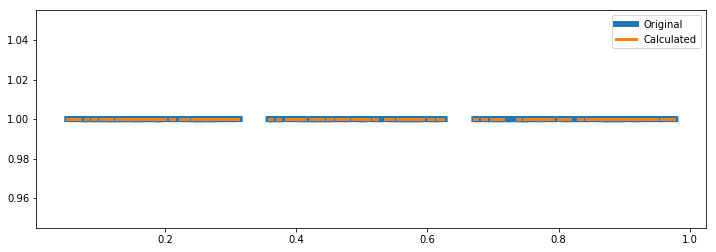

filename: FacesOnFilm_WaitingForGa_MIX.wav
file label size: 535
Original proportion of vocals:  0.24701455545040782
Resumed proportion of vocals:  0.27476635514018694
 


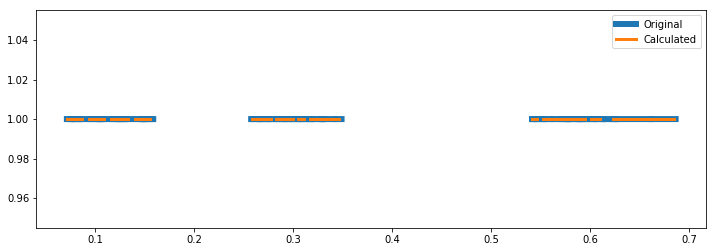

filename: Wolf_DieBekherte_MIX.wav
file label size: 392
Original proportion of vocals:  0.6344604980018445
Resumed proportion of vocals:  0.6836734693877551
 


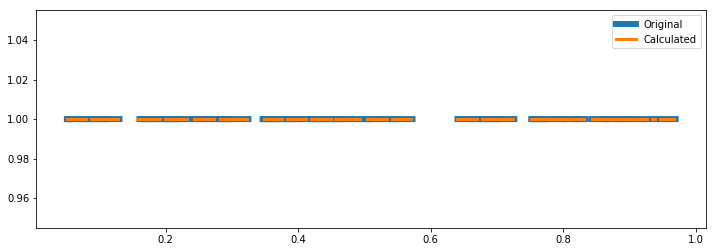

filename: SecretMountains_HighHorse_MIX.wav
file label size: 739
Original proportion of vocals:  0.34850835224767723
Resumed proportion of vocals:  0.36671177266576455
 


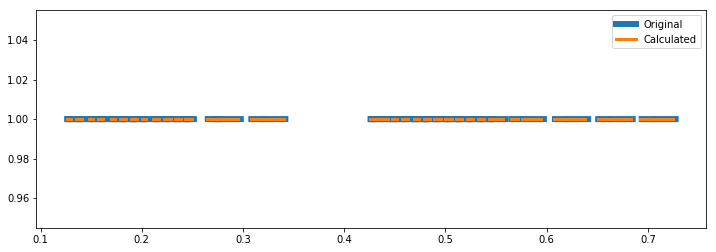

filename: MusicDelta_Reggae_MIX.wav
file label size: 35
Original proportion of vocals:  0.3835161183117315
Resumed proportion of vocals:  0.5142857142857142
 


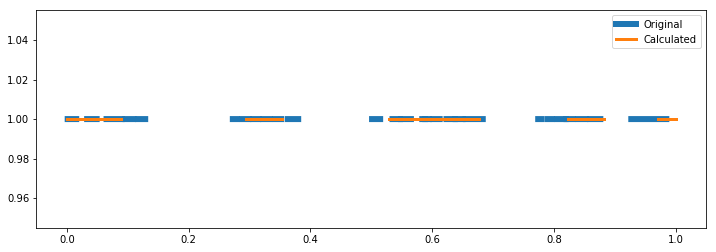

filename: NightPanther_Fire_MIX.wav
file label size: 442
Original proportion of vocals:  0.4977651804208002
Resumed proportion of vocals:  0.581447963800905
 


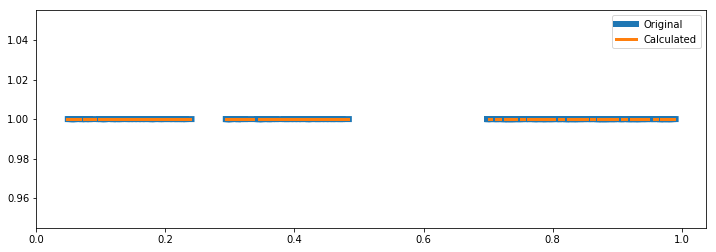

filename: Schumann_Mignon_MIX.wav
file label size: 546
Original proportion of vocals:  0.5825566500287115
Resumed proportion of vocals:  0.6758241758241759
 


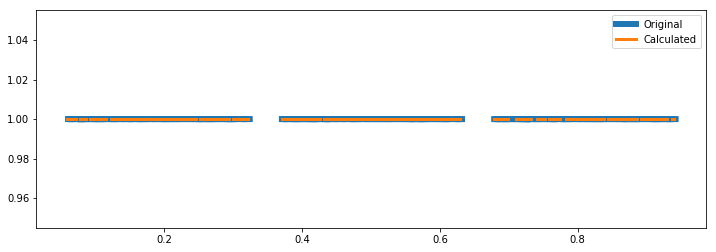

voiced  4968
unvoiced  6031


In [16]:
# Define lists to store the training features and corresponding training labels
train_features = []
train_labels = []

# For every audio file in the training set, load the VGGish file and then save the features
# and corresponding resumed label in the designated lists
for tf in train_files:
    
    print("filename: {:s}".format(os.path.basename(tf)))
    
    # Load VGGish audio embeddings
    vggish = pd.read_csv(tf[:-7]+"VGGish.csv",index_col=None, header=None)
    vggish = pd.DataFrame.as_matrix(vggish)
    
    # Read labels for each frame
    f0line = pd.read_csv(tf[:-7]+"MELODY1.csv",index_col=None, header=None)
    f0line = pd.DataFrame.as_matrix(f0line)[:,1]

    feature_vector = []
    tf_label = []
    
    for idx in range(vggish.shape[0]):
        start = idx*half_sec
        
        # Append values on the feature vector
        feature_vector.append(vggish[idx])
   
        # Adjust labels to our classes
        if len([x for x in f0line[start:start+feature_length] if x > 0]) > half_sec:
            tf_label.append('present')
        else:
            tf_label.append('abscent')

    # Get labels index
    tf_label_ind = [labels.index(lbl) for lbl in tf_label]
    print("file label size: {:d}".format(len(tf_label_ind)))
    
    vocal = sum([1 for x in f0line if x > 1])
    print("Original proportion of vocals: ", vocal/len(f0line))
    
    vocal = sum([x for x in tf_label_ind if x == 1])
    vocal_chuncks += vocal
    unvocal_chuncks += len(tf_label_ind) - vocal
    print("Resumed proportion of vocals: ", vocal/len(tf_label_ind))
    
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        train_features.append(feature_vector[idx])
        train_labels.append(tf_label_ind[idx]) 
    print(" ")
    
    print_labels(np.array(f0line), np.array(tf_label_ind).astype('float'))

    
print ("voiced ", vocal_chuncks)
print ("unvoiced ", unvocal_chuncks)